# Requirements

1. This is a classification problem.
2. Use stratified sampling to select 80% data for training and 20% for testing.
3. Main steps of the project are
(a) “discover and visualise the data”,
(b) “prepare the data for machine learning algorithms”,
(c) “select and train models”,
(d) “fine-tune the models” and
(e) “evaluate the outcomes”. You can structure the project in your own way. Some steps can be performed more than once.
4. In the steps (c) and (d) above, you must work with at least three machine learning algorithms.
5. Explanation of each step together with the Python codes must be included.
6. A comparison of the models’ performance must be included.
7. Based on your experience in the assignments, write a brief report that compares Spark MLlib and Scikit-Learn (e.g., their pros/cons or similarity/difference).

# Setup

In [ ]:
!pip install pyspark py4j

In [ ]:
import os
import sys

from pyspark.ml.feature import StandardScaler
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
import pyspark.sql.functions as F
from pyspark.sql import types as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use(style='seaborn')

from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler

<ipython-input-126-6090009d5155>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [ ]:

# build spark session
spark = SparkSession.builder.appName("mySparkSession").getOrCreate()

## Data loading

In [ ]:
# mount to Google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Scheme definition

In [ ]:
from pyspark.sql.types import *

# Specifying the schema for your data
new_schema = StructType([
    StructField("ID", StringType(), False),
    StructField("Customer_ID", StringType(), False),
    StructField("Month", StringType(), False),
    StructField("Name", StringType(), False),
    StructField("Age", IntegerType(), False),
    StructField("SSN", StringType(), False),
    StructField("Occupation", StringType(), False),
    StructField("Annual_Income", FloatType(), False),
    StructField("Monthly_Inhand_Salary", FloatType(), False),
    StructField("Num_Bank_Accounts", IntegerType(), False),
    StructField("Num_Credit_Card", IntegerType(), False),
    StructField("Interest_Rate", IntegerType(), False),
    StructField("Num_of_Loan", IntegerType(), False),
    StructField("Type_of_Loan", StringType(), False),
    StructField("Delay_from_due_date", IntegerType(), False),
    StructField("Num_of_Delayed_Payment", IntegerType(), False),
    StructField("Changed_Credit_Limit", FloatType(), False),
    StructField("Num_Credit_Inquiries", IntegerType(), False),
    StructField("Credit_Mix", StringType(), False),
    StructField("Outstanding_Debt", FloatType(), False),
    StructField("Credit_Utilization_Ratio", FloatType(), False),
    StructField("Credit_History_Age", StringType(), False),
    StructField("Payment_of_Min_Amount", StringType(), False),
    StructField("Total_EMI_per_month", FloatType(), False),
    StructField("Amount_invested_monthly", FloatType(), False),
    StructField("Payment_Behaviour", StringType(), False),
    StructField("Monthly_Balance", FloatType(), False),
    StructField("Credit_Score", StringType(), False)
])

In [ ]:
# Spark dataframe
df = spark.read.csv('/content/drive/MyDrive/dataset/train.csv', header = True, inferSchema = True)

# Assignment 2

##Discover And Visualise The Data

### Examining the dataset, to find out its structure, features and size. Explore the data.


In [ ]:
# Print the shape of the Spark dataframe
print("DataFrame shape")
print("-"*20)
print(f"No. of rows: {df.count()}\nNo. of columns: {len(df.columns)}")

DataFrame shape
--------------------
No. of rows: 100000
No. of columns: 28


In [ ]:
# Show the content of the Spark dataframe
df.show(truncate = False)

+------+-----------+--------+---------------+----+-----------+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------------------------------------------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+----------------------+---------------------+-------------------+-----------------------+--------------------------------+------------------+------------+
|ID    |Customer_ID|Month   |Name           |Age |SSN        |Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan                                                       |Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age    |Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Paymen

In [ ]:
# Print the schema of the Spark dataframe
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true

In [ ]:
# Print the name of column headers
df.columns

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

### Summary of dataframe

In [ ]:
summary = df.describe()
summary.show()

+-------+-------+-----------+------+------+------------------+-----------+----------+------------------+---------------------+-----------------+------------------+------------------+------------------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+------------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+--------------------+------------+
|summary|     ID|Customer_ID| Month|  Name|               Age|        SSN|Occupation|     Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|   Num_Credit_Card|     Interest_Rate|       Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|  Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|     Monthly_Balance|Cred

### Visualise the missing data


In [ ]:
# Check if there is any NULL values.
from pyspark.sql.functions import col, count, isnan, when
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-----------+-----+----+---+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
| ID|Customer_ID|Month|Name|Age|SSN|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+---+-----------+-----+----+---+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+---

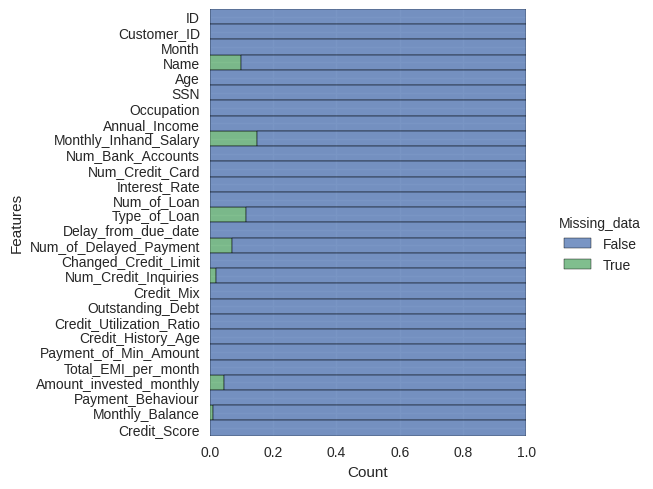

In [ ]:
# Function to visualize missing value
def na_ratio_plot(df=df):
    sns.displot(df.toPandas().isna().melt(value_name='Missing_data',var_name='Features'),y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

na_ratio_plot()

### Target: Credit score distribution plot

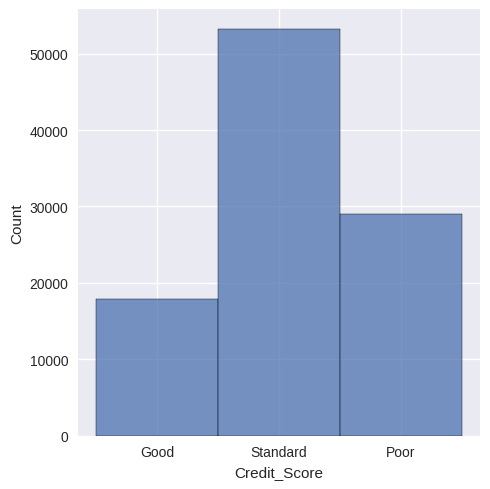

In [ ]:
sns.displot(df.toPandas()["Credit_Score"])

### Distribution of attributes

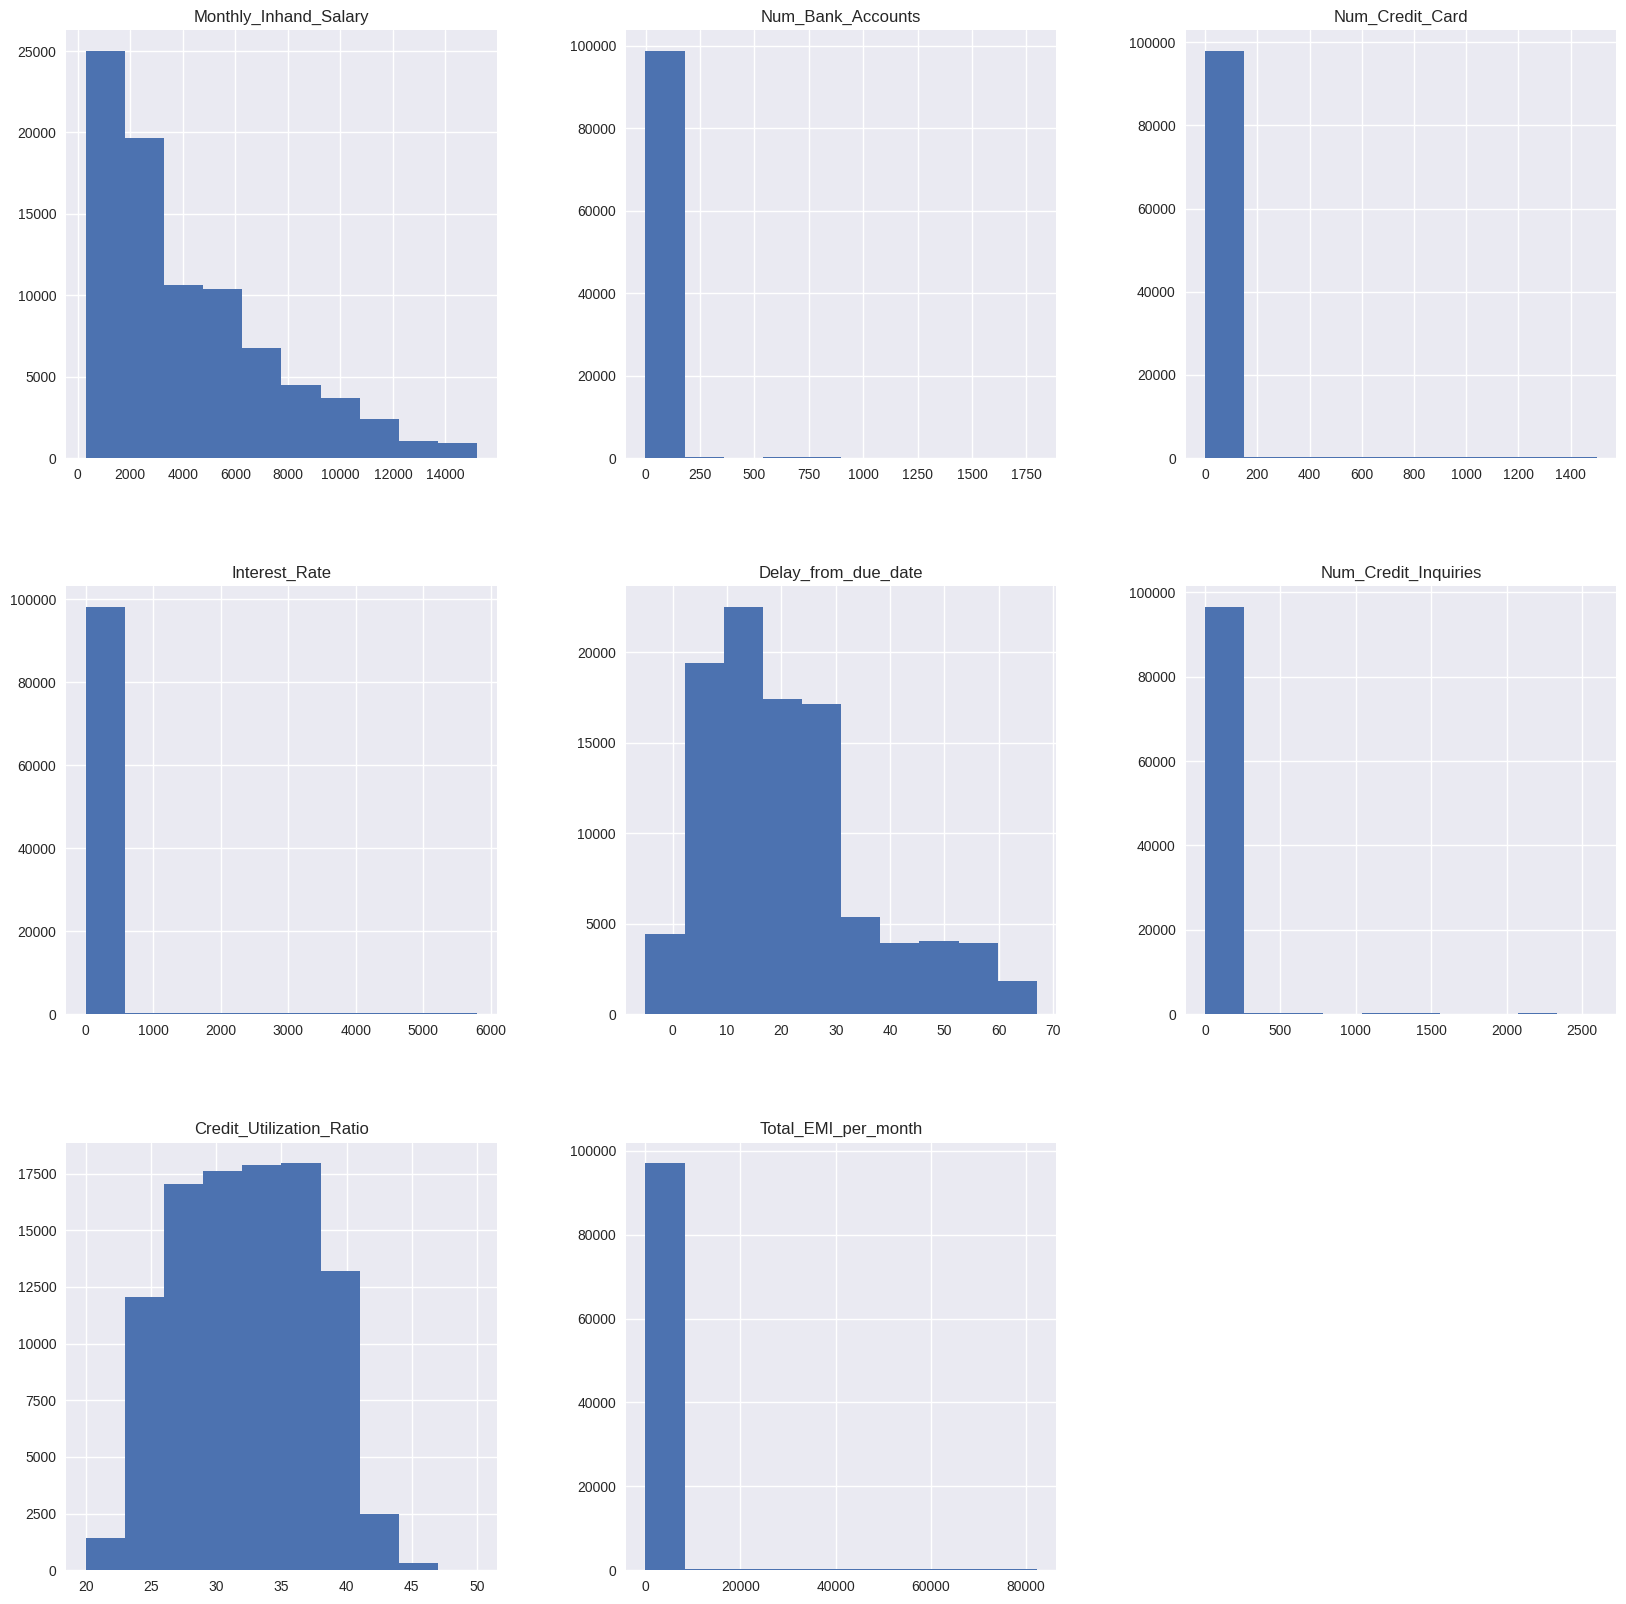

In [ ]:
#See the distribution of each variable
df.toPandas().hist(figsize = (20, 20))
plt.show()

### Unique count

In [ ]:
from pyspark.sql.functions import col, countDistinct

df.select([countDistinct(col(c)).alias(c) for c in df.columns]).show()


+------+-----------+-----+-----+----+-----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|    ID|Customer_ID|Month| Name| Age|  SSN|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+------+-----------+-----+-----+----+-----+----------+-------------+---------------------+-----------------+---------------+--------

##Preparing The Data For Machine Learning Algorithms

### Dropping columns ID, Name, SSN
Reason being, too many unique values and not useful for training and testing. Will use Customer ID for reference

In [ ]:
columns_to_drop = ["ID","Name","SSN"]
df = df.drop(*columns_to_drop)

In [ ]:
df.columns

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

### Handle Invalid Data

#### Handle '_' invalid values

Looking at the dataset we notice that there are alot of weird values with '_' which affects the data that can be used.

In [ ]:
#as most of the data with weird values has _ , we replace them with null and populate the dataset with the common values, we have to ignore payment behveius as it has legit _s
def replace_underscore_with_null(df):
    # Iterate through each column
    for col_name in df.columns:
        # Exclude 'Payment_Behaviour' from replacement
        if col_name not in ['Customer_ID','Payment_Behaviour']:
            # Replace values containing '_' with None
            df = df.withColumn(col_name, F.when(F.col(col_name).contains('_'), None).otherwise(F.col(col_name)))

    return df

df_cleaned_underscore = replace_underscore_with_null(df)

# Show the DataFrame with underscores replaced by null values
df_cleaned_underscore.show(30)

+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|Customer_ID|   Month| Age|  Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+----

#### Handle invalid payment_behaviour values

In [ ]:
#As the Column Payment_Behaviours has some strange values like !@9#%8, we clear them and replace them with null
df_cleaned_underscore_weirdvalues = df_cleaned_underscore.withColumn('Payment_Behaviour', F.when(F.col('Payment_Behaviour').isin('!@9#%8'), None).otherwise(F.col('Payment_Behaviour')))
df_cleaned_underscore_weirdvalues.show(30)

+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|Customer_ID|   Month| Age|  Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+----

### Handle missing data



#### #Drop old missing values method

In [ ]:
# from functools import reduce
# from pyspark.sql.functions import col, when

# def any_null(cols):
#     return reduce(lambda a, b: a | b, (col(c).isNull() for c in cols))

# rows_with_missing = df.filter(any_null(df.columns)).count()

# percentage_dropped = rows_with_missing / df.count() * 100
# print(f"Rows with missing values: {rows_with_missing}/ {df.count()}" )
# print(f"Percentage of missing values: {percentage_dropped}%")


# df_cleaned = df.dropna()

# print(f"Rows in cleaned DataFrame: {df_cleaned.count()}")


### Identifying Categorical and numerical columns

In [ ]:
categorical = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
numerical = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
stages = []



### Transforming columns and data

#### Manually mapping

In [ ]:
#helper function to change of all the values to integer
def map_values_to_int(df, column_name, mapping_dict):
    """
    Replace values in the specified column of a DataFrame with mapped integer values.

    Parameters:
    - df: PySpark DataFrame
    - column_name: Name of the column to be mapped
    - mapping_dict: Dictionary for mapping values to integers

    Returns:
    - df: PySpark DataFrame with the updated column
    """

    # Define a function to map values to integers based on the provided dictionary
    def map_to_int(value):
        return mapping_dict.get(value, None)

    # Create a UDF (User Defined Function) for mapping
    map_udf = F.udf(map_to_int, IntegerType())

    # Apply mapping to the specified column and create a new column with '_Int' suffix
    df_mapped = df.withColumn(column_name, map_udf(column_name))

    return df_mapped

In [ ]:
# Define mapping dictionaries for each column
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
occupation_mapping = {'Scientist': 1, 'Musician': 2, 'Lawyer': 3, 'Teacher': 4, 'Developer': 5, 'Writer': 6,
                      'Architect': 7, 'Mechanic': 8, 'Entrepreneur': 9, 'Journalist': 10, 'Doctor': 11,
                      'Engineer': 12, 'Accountant': 13, 'Manager': 14}
credit_mix_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
payment_of_min_amount_mapping = {'No': 0, 'Yes': 1, 'NM': -1}
payment_behaviour_mapping = {'Low_spent_Small_value_payments': 1, 'High_spent_Small_value_payments': 2,
                             'Low_spent_Medium_value_payments': 3, 'High_spent_Medium_value_payments': 4,
                             'Low_spent_Large_value_payments': 5, 'High_spent_Large_value_payments': 6}
credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}


df_mapped = map_values_to_int(df_cleaned_underscore_weirdvalues, 'Month', month_mapping)
df_mapped = map_values_to_int(df_mapped, 'Occupation', occupation_mapping)
df_mapped = map_values_to_int(df_mapped, 'Credit_Mix', credit_mix_mapping)
df_mapped = map_values_to_int(df_mapped, 'Payment_of_Min_Amount', payment_of_min_amount_mapping)
df_mapped = map_values_to_int(df_mapped, 'Payment_Behaviour', payment_behaviour_mapping)




In [ ]:
#All the values have been mapped to integer values
df_mapped.show(50)

+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+------------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------

#### Handle age values

In [ ]:
# cleaning the age column after all the string values have been mapped
from pyspark.sql.types import IntegerType

# Define a User-Defined Function (UDF) to clean the 'age' column
def clean_age(age_str):
    try:
        # Check if the string is a valid integer and does not contain additional underscores
        if age_str is not None and age_str.isdigit() and '_' not in age_str:
            age = int(age_str)

            # Check for a valid age range (e.g., between 0 and 100)
            if 0 <= age <= 100:
                return age
            else:
                return None
        else:
            return None
    except ValueError:
        # Handle non-convertible values
        return None



In [ ]:
# Register the UDF
clean_age_udf = F.udf(clean_age, IntegerType())

# Apply the UDF to the 'age' column
df_cleaned_age = df_mapped.withColumn('Age', clean_age_udf(F.col('Age')))

# Show the cleaned DataFrame
df_cleaned_age.show(50)


+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+------------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------

In [ ]:
df_cleaned_age.show()

+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+------------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------

#### Check missing values

In [ ]:
df_cleaned_age.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned_age.columns]).show()

+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+------

### Convert Numerical columns to integer

#### Cast the numerical columns

In [ ]:
dt_final = df_cleaned_age


In [ ]:
print("Before update:")
print(dt_final.printSchema())

for name in numerical:
    dt_final = dt_final.withColumn(name, dt_final[name].cast('int'))

print("After update:")
print(dt_final.printSchema())


Before update:
root
 |-- Customer_ID: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: integer (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: integer (nullable = true)
 |-- Total_EMI_per_month: doub

In [ ]:
print(numerical)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [ ]:
print(dt_final.show())

+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------

#### Numerical imputter



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer


# Initialize the Imputer
imputer = Imputer(
    inputCols= numerical, #specifying the input column names
    outputCols=numerical, #specifying the output column names
    strategy="mean"                  # or "median" if you want to use the median value
)

# Fit the Imputer
model = imputer.fit(dt_final)

# Transform the dataset
imputed_df = model.transform(dt_final)

imputed_df.show(5)



+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-

In [ ]:
df_cleaned_age.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned_age.columns]).show()

+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month| Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+------

In [ ]:
imputed_df.select([count(when(col(c).isNull(), c)).alias(c) for c in imputed_df.columns]).show()

+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+---------

In [ ]:
imputed_df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: integer (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: integer (nullable = true)
 |-- Num_Credit_Inquiries: integer (nullable = true)
 |-- Credit_Mix: integer (nullable = true)
 |-- Outstanding_Debt: integer (nullable = true)
 |-- Credit_Utilization_Ratio: integer (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: integer (nullable = true)
 |-- Total_EMI_per_month: integer (nu

In [ ]:
otherCols = ["Occupation", "Credit_Mix", "Payment_Behaviour"]

# Initialize the Imputer
o_imputer = Imputer(
    inputCols= otherCols, #specifying the input column names
    outputCols=otherCols, #specifying the output column names
    strategy="mean"                  # or "median" if you want to use the median value
)

# Fit the Imputer
o_model = o_imputer.fit(imputed_df)

# Transform the dataset
final_df = o_model.transform(imputed_df)

final_df.show(5)

+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-

In [ ]:
final_df.select([count(when(col(c).isNull(), c)).alias(c) for c in final_df.columns]).show()

+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+---------

### String missing values
Occupation, type of loan, credit mix and payement behaviour

In [ ]:

df_filtered = final_df.filter(final_df["Type_of_Loan"].isNull())
print(df_filtered.count())



11408


In [ ]:


final_df  = final_df.na.fill("unknown","Type_of_Loan")
df_filtered = final_df .filter(final_df ["Type_of_Loan"].isNull())
print(df_filtered.count())


final_df.printSchema()

0
root
 |-- Customer_ID: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: integer (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Type_of_Loan: string (nullable = false)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: integer (nullable = true)
 |-- Num_Credit_Inquiries: integer (nullable = true)
 |-- Credit_Mix: integer (nullable = true)
 |-- Outstanding_Debt: integer (nullable = true)
 |-- Credit_Utilization_Ratio: integer (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: integer (nullable = true)
 |-- Total_EMI_per_month: integer 

In [ ]:
final_df.select([count(when(col(c).isNull(), c)).alias(c) for c in final_df.columns]).show()

+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+---------

### Save df for fine-tuning model

#### StringIndexer method

In [ ]:
# credit_data holds the transformed dataframe with all the indexed value
credit_data = final_df

credit_data.show()

+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Customer_ID|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----------+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-

In [ ]:
credit_data = credit_data.drop("Customer_ID")

In [ ]:
credit_data.show()

+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+-----------------

In [ ]:
colToStringIndex = ["Type_of_Loan", "Credit_History_Age", "Credit_Score"]

In [ ]:
# String indexer for all cat columns
for name in colToStringIndex:
    cat_indexer = StringIndexer(inputCol=name, outputCol= name + '_index')
    cat_indexer_model = cat_indexer.fit(credit_data)
    credit_data = cat_indexer_model.transform(credit_data)

In [ ]:
print(f'All Columns:{credit_data.columns}')
print(f"Dropping {len(colToStringIndex)} old non-index categorical columns....")
credit_data = credit_data.drop(*colToStringIndex)
print(f"\nUpdated Columns: {credit_data.columns}")

All Columns:['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Type_of_Loan_index', 'Credit_History_Age_index', 'Credit_Score_index']
Dropping 3 old non-index categorical columns....

Updated Columns: ['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly

In [ ]:
credit_data.show()

+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------------+------------------------+------------------+
|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Type_of_Loan_index|Credit_History_Age_index|Credit_Score_index|
+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------

In [ ]:
label_stringIdx = StringIndexer(inputCol = 'Credit_Score_index', outputCol = 'label')

In [ ]:
fine_tuning_df = credit_data

fine_tuning_df.printSchema()

root
 |-- Month: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: integer (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: integer (nullable = true)
 |-- Num_Credit_Inquiries: integer (nullable = true)
 |-- Credit_Mix: integer (nullable = true)
 |-- Outstanding_Debt: integer (nullable = true)
 |-- Credit_Utilization_Ratio: integer (nullable = true)
 |-- Payment_of_Min_Amount: integer (nullable = true)
 |-- Total_EMI_per_month: integer (nullable = true)
 |-- Amount_invested_monthly: integer (nullable = true)
 |-- Payment_Behaviour: integer (nullable = true)
 |-- Monthly_Bal

### Visualize correlation

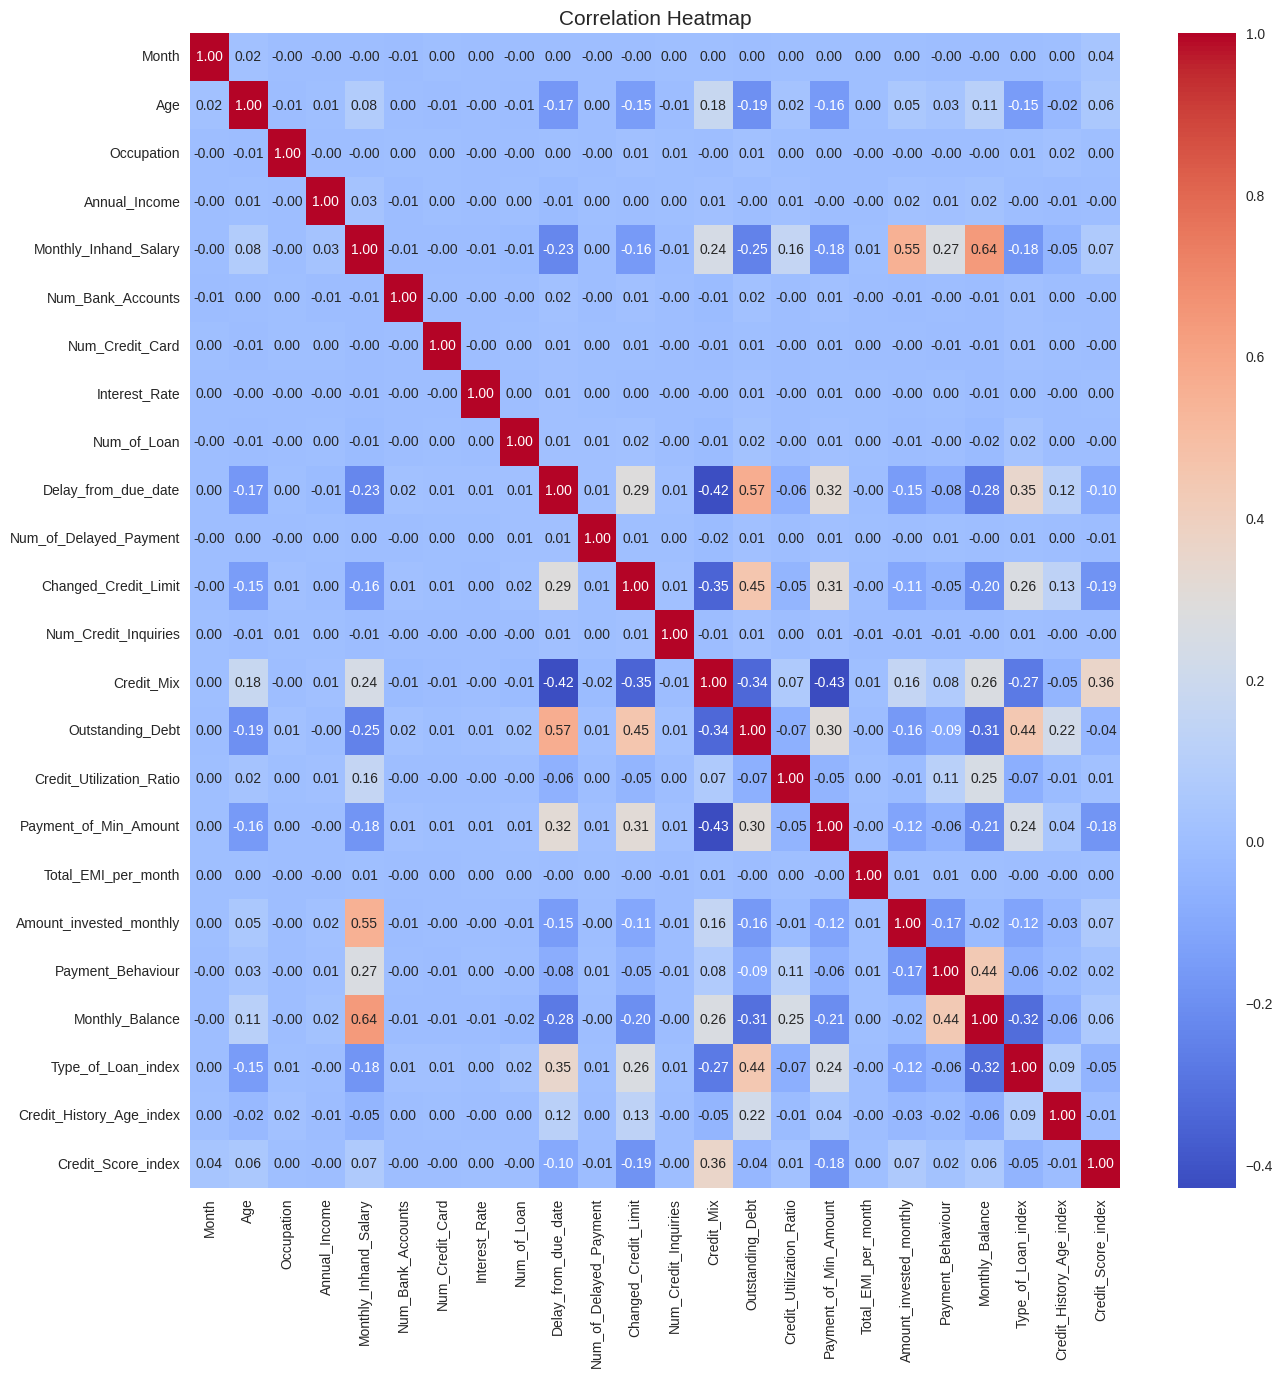

In [ ]:
#Heatmap size
plt.figure(figsize = (15, 15))


#Create a correlation heatmap
sns.heatmap(fine_tuning_df.toPandas().corr(),fmt = ".2f", cmap='coolwarm',
            annot = True)

#Centralise the title
plt.title("Correlation Heatmap", fontsize =  15,loc = 'center')

#Show the correlation heatmap
plt.show()

In [ ]:
fine_tuning_df.select([countDistinct(col(c)).alias(c) for c in fine_tuning_df.columns]).show()

+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------------+------------------------+------------------+
|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Type_of_Loan_index|Credit_History_Age_index|Credit_Score_index|
+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------

### Vector Assembler for all features

In [ ]:
print(credit_data.columns)

['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Type_of_Loan_index', 'Credit_History_Age_index', 'Credit_Score_index']


In [ ]:
assemblerInputs = credit_data.columns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="featuresNotScaled")

### Scale the vector column

In [ ]:
stdscaler = StandardScaler(inputCol="featuresNotScaled", outputCol="features", withStd=True, withMean=False)

### Apply Transformers/Estimators to Pipeline

In [ ]:
stages = []

stages += [label_stringIdx]
stages += [assembler]
stages += [stdscaler]
print(stages)

[StringIndexer_f1da3003a129, VectorAssembler_c7ad9f2337fb, StandardScaler_3b71fd0496cc]


In [ ]:
credit_data.show()

+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------------+------------------------+------------------+
|Month|Age|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Type_of_Loan_index|Credit_History_Age_index|Credit_Score_index|
+-----+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------

In [ ]:
pipeline = Pipeline(stages = stages)
pipeline_model = pipeline.fit(credit_data)
credit_data = pipeline_model.transform(credit_data)

In [ ]:
selected = ['label', 'features']
credit_data = credit_data.select(selected)
credit_data.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)




### Stratified Sampling
Get samples

- Training: 4/5
- Testing: 1/5

In [ ]:
#See initial distribution of the 3 credit score
credit_data.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|53174|
|  1.0|28998|
|  2.0|17828|
+-----+-----+



In [ ]:

train_data = credit_data.sampleBy("label", fractions = {0.0: 4/5, 1.0: 4/5, 2.0: 4/5}, seed =  42)

#Subtracting the train_data from the original data to get the test set (remaining samples)
test_data = credit_data.subtract(train_data)

In [ ]:
train_data.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|42575|
|  1.0|23174|
|  2.0|14291|
+-----+-----+



In [ ]:
test_data.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|10599|
|  1.0| 5824|
|  2.0| 3537|
+-----+-----+



Original dataset distribution:


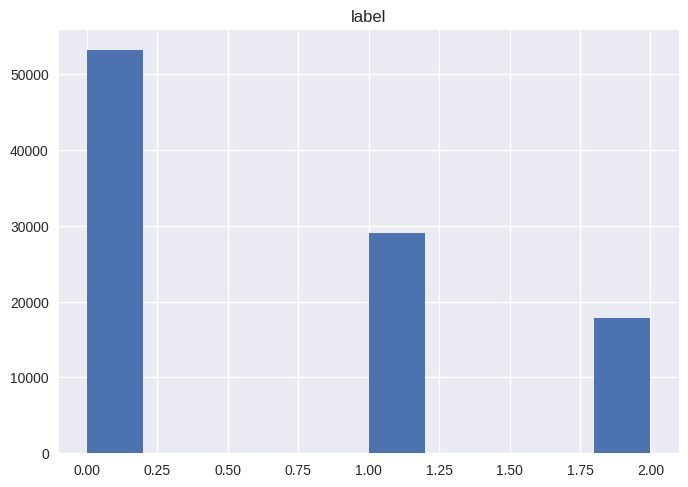

Training dataset distribution:


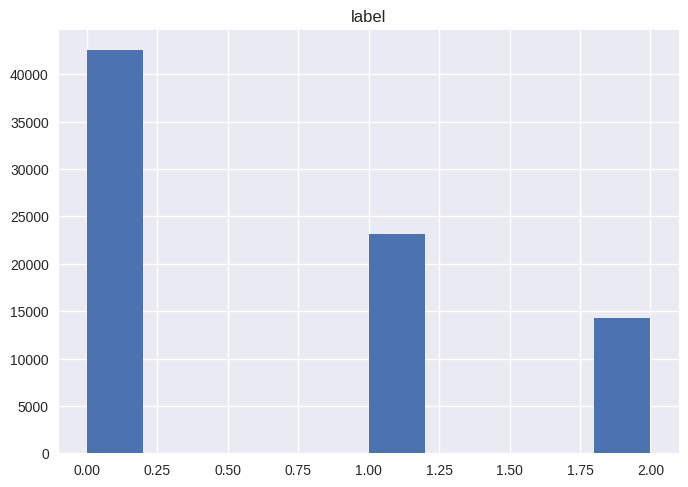

Testing dataset distribution:


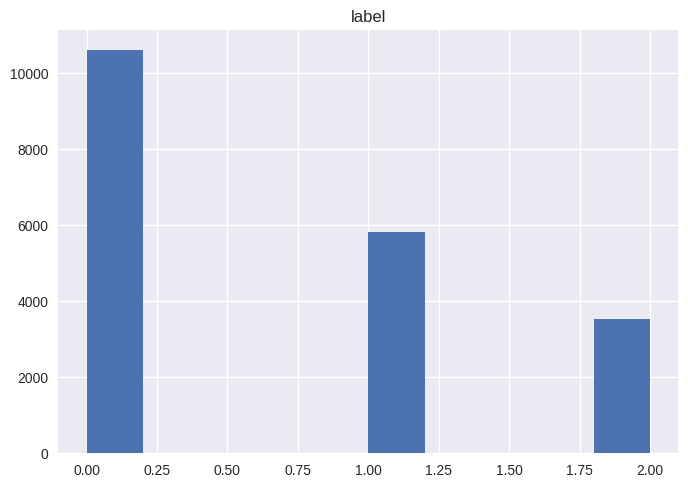

In [ ]:
# See the distribution of data in original set
print("Original dataset distribution:")
credit_data.select('label').toPandas().hist()
plt.show()

# See the distribution of data in training set
print("Training dataset distribution:")
train_data.select('label').toPandas().hist()
plt.show()

# See the distribution of data in testing set
print("Testing dataset distribution:")
test_data.select('label').toPandas().hist()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

##Machine learning algorithms

1. Decision tree
2. Logistic regression
3. Random forest

In [ ]:
#Multiclass Classification - accuracy, precision, recall, F1
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

accuracy_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                  metricName = 'accuracy')

precision_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                   metricName = 'precisionByLabel')

recall_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                metricName = 'recallByLabel')

f1_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                            metricName = 'f1')


#Binary Classification - AUC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol = 'label',
                                          rawPredictionCol = 'prediction',
                                          metricName = 'areaUnderROC')

#Function to print all the metrics based on each model's predictions
def print_metrics(predictions):

    print("Metrics:")

    accuracy = accuracy_eval.evaluate(predictions)
    print(f'Accuracy: {(accuracy * 100):.3f}')
    print(f'Test Error: {((1.0 - accuracy) * 100):.3f}')

    precision = precision_eval.evaluate(predictions)
    print(f'Precision: {precision:.3f}')

    recall = recall_eval.evaluate(predictions)
    print(f'Recall: {recall:.3f}')

    f1 = f1_eval.evaluate(predictions)
    print(f'F1: {f1:.3f}')

    auc = evaluator.evaluate(predictions)
    print(f'Test Area Under ROC: {auc:.3f}')

##Train models

In [ ]:
def ConfusionMatrixHeatMap(cm, modelTitle):
    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Good', 'Poor', 'Standard'],
                yticklabels=['Good', 'Poor', 'Standard'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(modelTitle)
    plt.show()

### Classification model - Decision Tree
- Instantiate a DecisionTreeClassifier model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

#labelCol ('LoadTypeNum') || featuresCol ('features')
dt = DecisionTreeClassifier(labelCol = 'label',
                            featuresCol = 'features')

#Train the DT model
print(train_data.columns)


fittedDT = dt.fit(train_data)

#Apply the model to the test dataset & see the predictions
#Actual: LoadTypeNum || Predicted: predictions
predictionsDT = fittedDT.transform(test_data)
print_metrics(predictionsDT)

['label', 'features']
Metrics:
Accuracy: 100.000
Test Error: 0.000
Precision: 1.000
Recall: 1.000
F1: 1.000
Test Area Under ROC: 1.000


-------------------------------------------------------------------------------------------------------------------------------

### Classification model - Logistic Regression
- Instantiate a LogisticRegression model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import LogisticRegression

#labelCol ('LoadTypeNum') || featuresCol ('features')
lr = LogisticRegression(labelCol = 'label',
                        featuresCol = 'features')

#Train the DT model
fittedLR = lr.fit(train_data)

#Apply the model to the test dataset & see the predictions
predictionsLR = fittedLR.transform(test_data)
print_metrics(predictionsLR)

Metrics:
Accuracy: 100.000
Test Error: 0.000
Precision: 1.000
Recall: 1.000
F1: 1.000
Test Area Under ROC: 1.000


### Classification model - Random Forest
- Instantiate a RandomForestClassifier model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

#labelCol ('LoadTypeNum') || featuresCol ('features')
rf = RandomForestClassifier(labelCol = 'label',
                            featuresCol = 'features')

#Train the DT model
fittedRF = rf.fit(train_data)

#Apply the model to the test dataset & see the predictions
predictionsRF = fittedRF.transform(test_data)
print_metrics(predictionsRF)

Metrics:
Accuracy: 97.320
Test Error: 2.680
Precision: 1.000
Recall: 1.000
F1: 0.973
Test Area Under ROC: 1.000


##Fine-tune the models

### Fine-tuning helper functions
- Define a user-defined transformer function to add a new feature (CO2_Emit)
- Define a fine-tuning function that can:
    - Select the best hyperparameters for a model from a parameter grid
    - Tune the model with/without the new feature(CO2_Emit) based on parameter specified
    - Evaluate the performance of the tuned model

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.sql.functions import udf
from pyspark.ml.tuning import TrainValidationSplit

# Defining a helper function to check deb to income ratio, in general the lower the ratio the better
def debt_to_income_ratio(debt, income):
    return debt / income if income > 0 else 0.0


# Defining a user-defined transform function to add a new feature to the existing dataframe
def DTI_AttributeAdder(df):
      # Register a UDF to be executed on dataframe
      DTI_Emit = udf(lambda x1, x2: debt_to_income_ratio(x1, x2), T.DoubleType())
      spark.udf.register("DTI_Emit", DTI_Emit)
      return df.withColumn('DTI_Emit', DTI_Emit('Outstanding_Debt', 'Annual_Income'))

def finetuning_improved(model, paramGrid, evaluator, train_data, test_data):
      # Instantiate TrainValidationSplit to apply cross-validation during fine-tuning
      print("Starting trainValidation Split")
      tvs = TrainValidationSplit(estimator = model,
                               estimatorParamMaps = paramGrid,
                               evaluator = evaluator,
                               parallelism = 1,
                               seed = 42)


      # Train the model using the training set find the best parameters for the model from the parameter grid
      tvsModel = tvs.fit(train_data)
      best_model = tvsModel.bestModel

      # Display tuned model's performance
      tuned_predictions = best_model.transform(test_data)

      print(f"Tuned predictions for {model}:")
      print()
      print_metrics(tuned_predictions)

### No new attribute added for fine tuning

In [ ]:
noAttributeTrainData = train_data
noAttributeTestData = test_data

### New attribute test and train dataset

In [ ]:
df_cleaned = fine_tuning_df
df_cleaned = DTI_AttributeAdder(df_cleaned)

newAttribute_credit_data = df_cleaned

newAttribute_label_stringIdx = StringIndexer(inputCol = 'Credit_Score_index', outputCol = 'label')

newAttribute_assemblerInputs = [c + "_index" for c in categorical] + numerical
newAttribute_assembler = VectorAssembler(inputCols=newAttribute_assemblerInputs, outputCol="featuresNotScaled")

newAttribute_stdscaler = StandardScaler(inputCol="featuresNotScaled", outputCol="features", withStd=True, withMean=False)

newAttribute_stages = []
newAttribute_stages += [newAttribute_label_stringIdx]
newAttribute_stages += [newAttribute_assembler]
newAttribute_stages += [newAttribute_stdscaler]

newAttribute_pipeline = Pipeline(stages = newAttribute_stages)
newAttribute_pipeline_model = pipeline.fit(newAttribute_credit_data)
newAttribute_credit_data = pipeline_model.transform(newAttribute_credit_data)

withAttributeTrain_data = credit_data.sampleBy("label", fractions = {0.0: 4/5, 1.0: 4/5, 2.0: 4/5}, seed =  42)
withAttributeTest_data = credit_data.subtract(withAttributeTrain_data)



In [ ]:
withAttributeTrain_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  2.0|[0.43643359828762...|
|  2.0|[0.87286719657525...|
|  2.0|[1.74573439315050...|
|  2.0|[2.18216799143813...|
|  2.0|[2.61860158972576...|
|  0.0|[3.49146878630101...|
|  2.0|[0.87286719657525...|
|  0.0|[1.30930079486288...|
|  2.0|[1.74573439315050...|
|  2.0|[2.18216799143813...|
|  2.0|[3.05503518801339...|
|  2.0|[3.49146878630101...|
|  2.0|[0.43643359828762...|
|  2.0|[0.87286719657525...|
|  2.0|[1.30930079486288...|
|  2.0|[2.18216799143813...|
|  2.0|[2.61860158972576...|
|  0.0|[3.05503518801339...|
|  0.0|[0.43643359828762...|
|  0.0|[0.87286719657525...|
+-----+--------------------+
only showing top 20 rows



### Fine-tuning Decision Tree
- Define parameter grid
- Apply finetuning function to tune the model

In [ ]:
# Define parameter grid
paramGrid = ParamGridBuilder()\
            .addGrid(dt.impurity, ['gini', 'entropy'])\
            .addGrid(dt.maxBins, [10, 20])\
            .addGrid(dt.maxDepth, [2, 5])\
            .build()

In [ ]:

print("Model performance with new attribute added: ")
finetuning_improved(model = dt, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)

# Fine-tuning the model without new attributes
print()
print("Model performance without new attribute added: ")
finetuning_improved(model = dt, paramGrid = paramGrid, evaluator = evaluator, train_data = noAttributeTrainData, test_data = noAttributeTestData)

Model performance with new attribute added: 
Starting trainValidation Split
Tuned predictions for DecisionTreeClassifier_cc2fe65880cb:

Metrics:
Accuracy: 100.000
Test Error: 0.000
Precision: 1.000
Recall: 1.000
F1: 1.000
Test Area Under ROC: 1.000

Model performance without new attribute added: 
Starting trainValidation Split


-------------------------------------------------------------------------------------------------------------------------------

# Fine-tuning Logistic Regression
- Define parameter grid
- Apply finetuning function to tune the model

In [ ]:
# Define parameter grid
paramGrid = ParamGridBuilder()\
            .addGrid(lr.maxIter, [1, 5, 10, 20, 50])\
            .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0])\
            .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])\
            .build()

In [ ]:
# Fine-tuning the model with new attribute CO2_Emit
print("Model performance with new attribute added: ")
finetuning_improved(model = lr, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)

# Fine-tuning the model without new attributes
print()
print("Model performance without new attribute added: ")
finetuning_improved(model = lr, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)


Model performance with new attribute added: 
Starting trainValidation Split
Tuned predictions for LogisticRegression_1c9a194dbabd:

Metrics:
Accuracy: 98.116
Test Error: 1.884
Precision: 1.000
Recall: 1.000
F1: 0.981
Test Area Under ROC: 1.000

Model performance without new attribute added: 
Starting trainValidation Split
Tuned predictions for LogisticRegression_1c9a194dbabd:

Metrics:
Accuracy: 98.116
Test Error: 1.884
Precision: 1.000
Recall: 1.000
F1: 0.981
Test Area Under ROC: 1.000


-------------------------------------------------------------------------------------------------------------------------------

# Fine-tuning Random Forest
- Define parameter grid
- Apply finetuning function to tune the model

In [ ]:
# Define parameter grid
paramGrid = ParamGridBuilder()\
            .addGrid(rf.impurity, ['gini', 'entropy'])\
            .addGrid(rf.numTrees, [5, 10])\
            .addGrid(rf.maxDepth, [2, 5])\
            .addGrid(rf.maxBins, [10, 20])\
            .build()

In [ ]:
print("Model performance with new attribute added: ")
finetuning_improved(model = rf, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)

# Fine-tuning the model without new attributes
print()
print("Model performance without new attribute added: ")
finetuning_improved(model = rf, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)


Model performance with new attribute added: 
Starting trainValidation Split
Tuned predictions for RandomForestClassifier_b6525010d68d:

Metrics:
Accuracy: 99.599
Test Error: 0.401
Precision: 1.000
Recall: 1.000
F1: 0.996
Test Area Under ROC: 1.000

Model performance without new attribute added: 
Starting trainValidation Split
Tuned predictions for RandomForestClassifier_b6525010d68d:

Metrics:
Accuracy: 99.599
Test Error: 0.401
Precision: 1.000
Recall: 1.000
F1: 0.996
Test Area Under ROC: 1.000


-------------------------------------------------------------------------------------------------------------------------------

#Outcome evaluation
Both DT (decision tree) and LR (logistic regression) seem to be overfitting the data, achieving perfect accuracy (100%) and a Test Error of 0.000. This is unlikely to generalize well to unseen data.
The RF (random forest) model seems to be a better choice, despite a lower accuracy (97.32%) and Test Error (2.68%). It shows a trade-off between accuracy and robustness, indicating better potential for generalization.

#  Spark MLlib and Scikit-Learn (pros/cons).

Scikit-Learn:

Strengths:
Easy to use and understand with extensive documentation.
Integrates well with popular visualization libraries like matplotlib and pandas.
Wide range of pre-built functions for tasks like data scaling and normalization.
Weaknesses:
Not scalable for large datasets, limiting processing to single machines.
Fine-tuning with cross-validation can be slow due to sequential processing.

SparkMLlib:

Strengths:
Handles big data effectively, scaling across multiple machines for faster processing.
Leverages Spark DataFrames for flexible data manipulation and SQL-like queries.
Weaknesses:
Requires manual feature engineering and vector assembly.
Lacks direct access to best parameters after fine-tuning, requiring manual interpretation.
Doesn't provide built-in functions for splitting data into training and testing sets.
Key Takeaways:

Choose Scikit-Learn for: smaller datasets, user-friendliness, and visualization needs.
Choose SparkMLlib for: big data analysis, parallel processing, and advanced data manipulation.

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------